In [14]:
print("ML Expt 5")
print("Dhwaj Jain S012")

ML Expt 5
Dhwaj Jain S012


Imported all the required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.utils import resample

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:

from sklearn.model_selection import train_test_split

from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor,
                              AdaBoostRegressor, GradientBoostingRegressor,
                              VotingRegressor, StackingRegressor)




Loaded the Dataset


In [17]:
try:
    df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='latin-1')
except UnicodeDecodeError:
    print("Error decoding with latin-1, trying another encoding...")
    try:
        df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Error decoding with ISO-8859-1, trying another encoding...")
        try:
            df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='cp1252')
        except UnicodeDecodeError:
            print("Could not decode with common encodings.")
            # You might need to inspect the file or try other encodings if none of these work.

print("Shape:", df.shape)
df.head()

Shape: (3829, 29)


/tmp/ipython-input-2830786033.py:2: ParserWarning: Skipping line 11: ',' expected after '"'

  df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='latin-1')
/tmp/ipython-input-2830786033.py:2: ParserWarning: Skipping line 201: ',' expected after '"'

  df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='latin-1')
/tmp/ipython-input-2830786033.py:2: ParserWarning: Skipping line 283: ',' expected after '"'

  df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='latin-1')
/tmp/ipython-input-2830786033.py:2: ParserWarning: Skipping line 318: ',' expected after '"'

  df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='latin-1')
/tmp/ipython-input-2830786033.py:2: ParserWarning: Skipping line 474: ',' expected after '"'

  df = pd.read_csv('train.csv', engine='python', on_bad_lines='warn', encoding='latin-1')
/tmp/ipython-input-2830786033.py:2: ParserWarning: Skipping line 647: ',' expecte

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635294096256,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696523629970756,-73.99161684624262,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.1298987149230735,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115415949685,-73.98903992265213,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976733742420574,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.80810998936211,-73.94375584395794,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073206530356,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004482560774,-122.43161868239788,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.74493212836325,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925626916626506,-77.0345955156553,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3829 non-null   object 
 1   log_price               3822 non-null   object 
 2   property_type           3819 non-null   object 
 3   room_type               3815 non-null   object 
 4   amenities               3813 non-null   object 
 5   accommodates            3813 non-null   object 
 6   bathrooms               3802 non-null   object 
 7   bed_type                3812 non-null   object 
 8   cancellation_policy     3806 non-null   object 
 9   cleaning_fee            3805 non-null   object 
 10  city                    3805 non-null   object 
 11  description             3802 non-null   object 
 12  first_review            2922 non-null   object 
 13  host_has_profile_pic    3785 non-null   object 
 14  host_identity_verified  3787 non-null   

In [19]:
df.size

111041

In [20]:
missing = df.isna().mean().sort_values(ascending=False)
print("\nTop missing features:\n", missing[missing>0].head(10))


Top missing features:
 host_response_rate        0.265605
review_scores_rating      0.249412
first_review              0.236876
last_review               0.236093
thumbnail_url             0.120136
neighbourhood             0.098981
zipcode                   0.022460
host_has_profile_pic      0.011491
host_identity_verified    0.010969
host_since                0.010969
dtype: float64


Data Preprocessing and Visualization

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 14 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) D

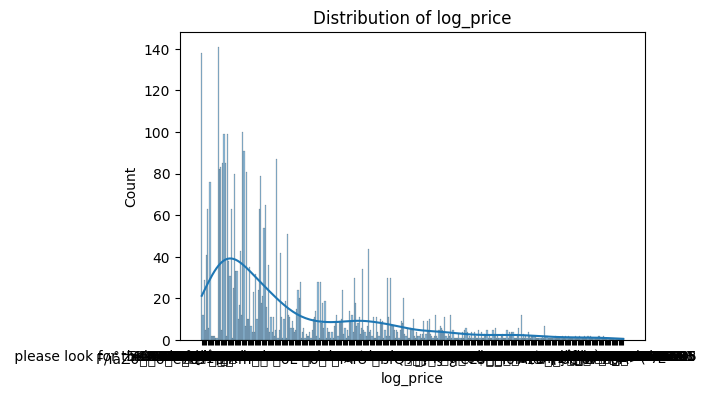

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['log_price'].dropna(), bins=50, kde=True)
plt.title('Distribution of log_price')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 18 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 17 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8 () missing from font(s) DejaVu Sa

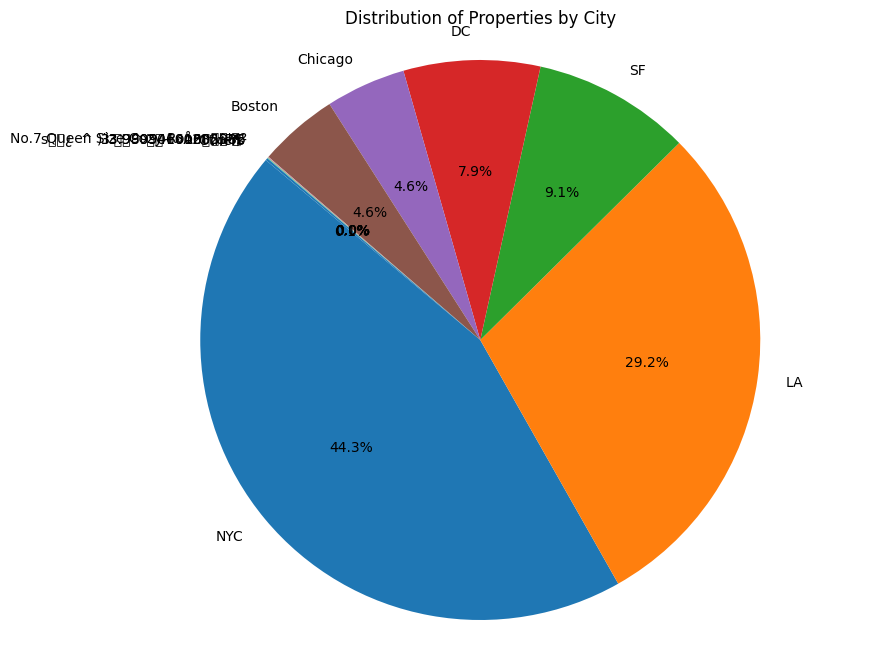

In [22]:

city_counts = df['city'].value_counts()

top_n = 10
if len(city_counts) > top_n:
    top_cities = city_counts.head(top_n)
    other_cities = pd.Series(city_counts[top_n:].sum(), index=['Others'])
    city_counts = pd.concat([top_cities, other_cities])

plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Properties by City')
plt.axis('equal')
plt.show()

/tmp/ipython-input-3875312118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts().index, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  fig.can

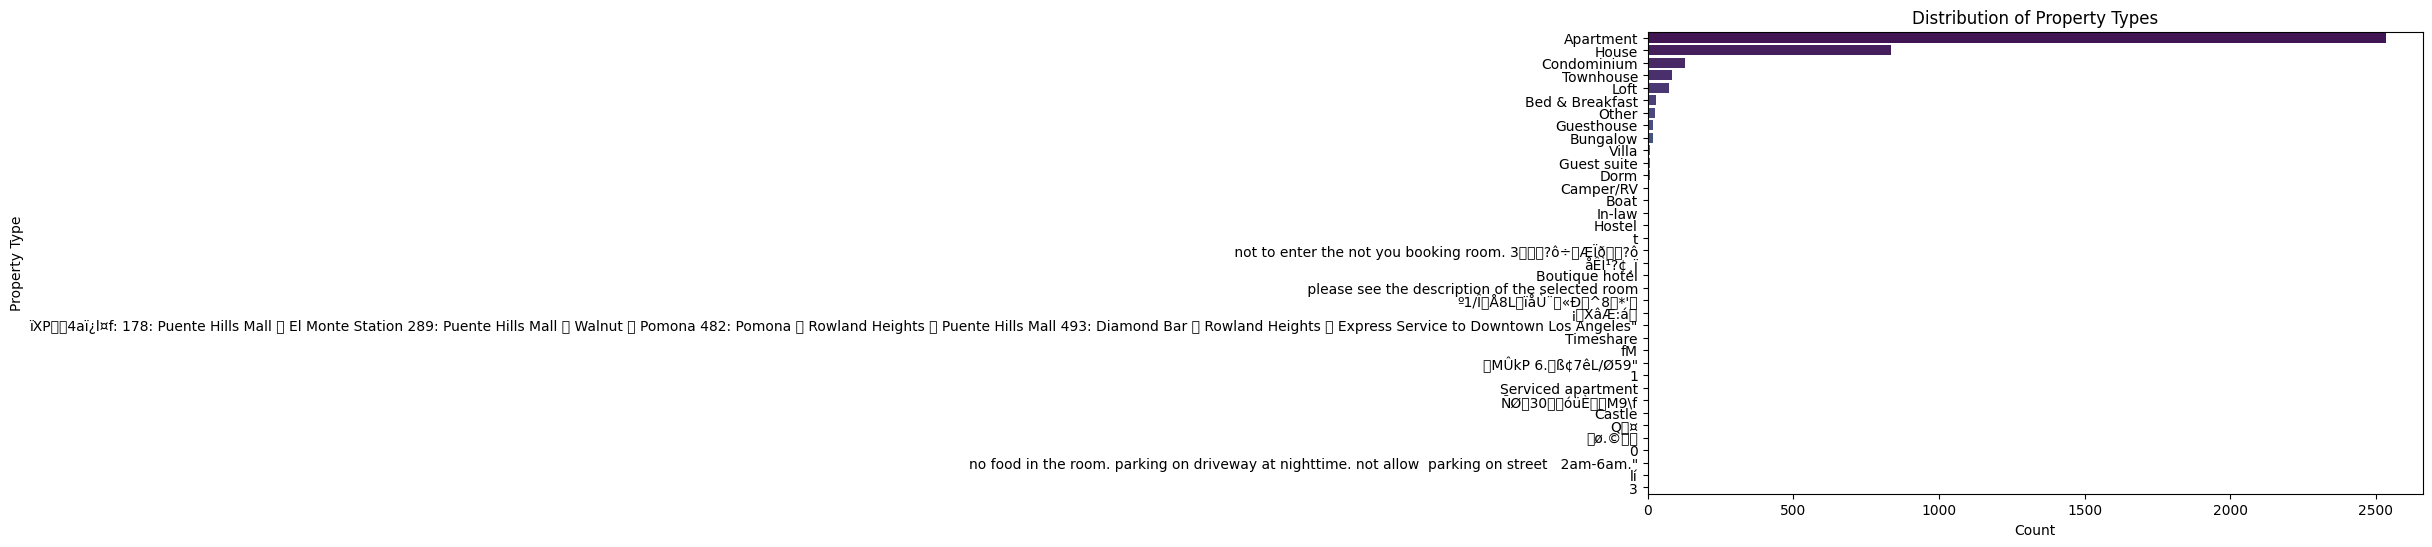

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

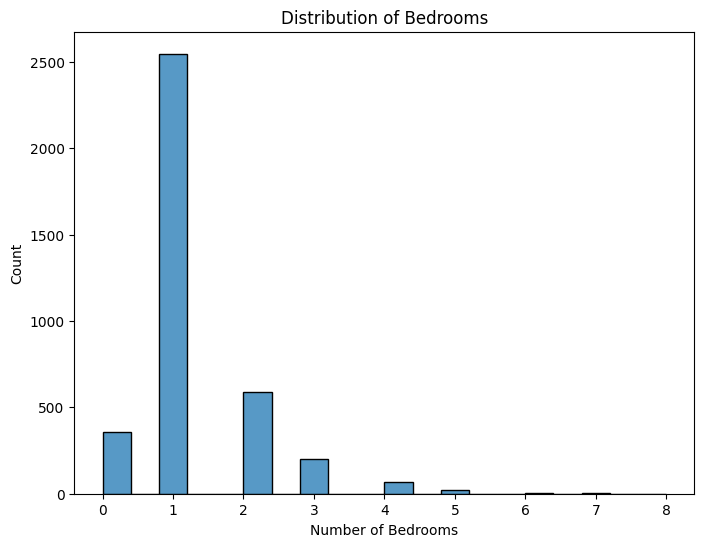

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bedrooms'].dropna(), bins=20, kde=False) # Use histplot for numerical data
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

In [25]:
drop_cols = ['id', 'thumbnail_url', 'host_name', 'description', 'name', 'listing_url', 'neighbourhood_overview', 'host_thumbnail_url']
present_drop = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=present_drop, errors='ignore')

In [26]:
def clean_amenities(cell):
    if pd.isna(cell):
        return []
    s = str(cell)

    s = s.strip('{}')
    parts = [p.strip().strip('"').strip("'") for p in s.split(',') if p.strip()!='']

    return parts

In [27]:
df['amenity_list'] = df['amenities'].apply(clean_amenities)
df['amenity_count'] = df['amenity_list'].apply(len)

In [28]:
common_amenities = ['Wireless Internet','Air conditioning','Kitchen','TV','Heating','Washer','Dryer']
for am in common_amenities:
    df['amenity_has_' + am.replace(' ','_').lower()] = df['amenity_list'].apply(lambda lst: int(any(am.lower() in x.lower() for x in lst)))


In [29]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('log_price') if 'log_price' in num_cols else None

In [30]:
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())



In [31]:
cat_cols = []
for c in ['property_type','room_type','bed_type','cancellation_policy']:
    if c in df.columns:
        cat_cols.append(c)
df[cat_cols] = df[cat_cols].fillna('Unknown')



In [32]:
if 'zipcode' in df.columns:
    df['zipcode'] = df['zipcode'].fillna('00000').astype(str)



In [35]:
drop_cols = ['first_review', 'last_review', 'host_since', 'amenities',
             'zipcode', 'neighbourhood', 'city']
df_clean = df.drop(columns=drop_cols)


X = df_clean.drop(columns=['log_price'])
y = df_clean['log_price']

In [36]:

cat_cols = X.select_dtypes(include=['object', 'bool']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns


num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", max_categories=20))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

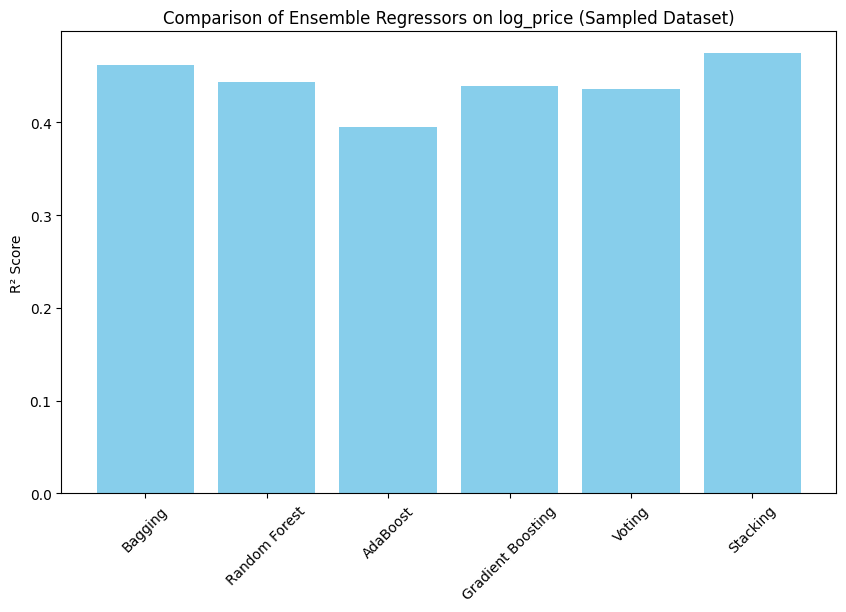

{'Bagging': 0.46150595061218613, 'Random Forest': 0.44325952379723654, 'AdaBoost': 0.3949330808809127, 'Gradient Boosting': 0.43979682493339334, 'Voting': 0.4356608328036262, 'Stacking': 0.474379457405816}


In [42]:
# Convert log_price to numeric, coercing errors to NaN
df_clean['log_price'] = pd.to_numeric(df_clean['log_price'], errors='coerce')

# Drop rows with missing log_price before splitting
df_clean = df_clean.dropna(subset=['log_price'])

# Explicitly fill None values in categorical columns before splitting
cat_cols_to_fill = df_clean.select_dtypes(include=['object', 'bool']).columns
for col in cat_cols_to_fill:
    if col != 'amenity_list': # Exclude amenity_list as it's handled separately
        df_clean[col] = df_clean[col].fillna('Unknown')


X = df_clean.drop(columns=['log_price'])
y = df_clean['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensemble models
models = {
    "Bagging": BaggingRegressor(random_state=42, n_estimators=30),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=30),
    "AdaBoost": AdaBoostRegressor(random_state=42, n_estimators=30),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=30),
    "Voting": VotingRegressor([
        ("rf", RandomForestRegressor(random_state=42, n_estimators=20)),
        ("gbr", GradientBoostingRegressor(random_state=42, n_estimators=20)),
        ("lr", LinearRegression())
    ]),
    "Stacking": StackingRegressor(
        estimators=[
            ("rf", RandomForestRegressor(random_state=42, n_estimators=20)),
            ("gbr", GradientBoostingRegressor(random_state=42, n_estimators=20))
        ],
        final_estimator=LinearRegression()
    )
}

# Exclude 'amenity_list' from categorical columns for the preprocessor
cat_cols = [col for col in X.select_dtypes(include=['object', 'bool']).columns if col != 'amenity_list']
num_cols = X.select_dtypes(include=['int64', 'float64']).columns


num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", max_categories=20))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])


results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = r2_score(y_test, y_pred)


plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.ylabel("R² Score")
plt.title("Comparison of Ensemble Regressors on log_price (Sampled Dataset)")
plt.xticks(rotation=45)
plt.show()

print(results)

In [43]:
print(results)

{'Bagging': 0.46150595061218613, 'Random Forest': 0.44325952379723654, 'AdaBoost': 0.3949330808809127, 'Gradient Boosting': 0.43979682493339334, 'Voting': 0.4356608328036262, 'Stacking': 0.474379457405816}


Loading Diabetes Regression dataset

In [47]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data_cls = load_diabetes()
X_cls = pd.DataFrame(data_cls.data, columns=data_cls.feature_names)
y_cls = pd.Series(data_cls.target, name="target")


print("Dataset Shape:", X_cls.shape)
print("Columns:", X_cls.columns)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)


scaler_c = StandardScaler()
Xc_train = scaler_c.fit_transform(Xc_train)
Xc_test = scaler_c.transform(Xc_test)

print("Classification data ready.")

Dataset Shape: (442, 10)
Columns: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Classification data ready.


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier,
                              VotingClassifier, StackingClassifier)
from sklearn.preprocessing import LabelEncoder


yc_cls_binned = pd.qcut(y_cls, q=4, labels=False, duplicates='drop')


Xc_train, Xc_test, yc_train_binned, yc_test_binned = train_test_split(
    X_cls, yc_cls_binned, test_size=0.2, random_state=42, stratify=yc_cls_binned
)


scaler_c = StandardScaler()
Xc_train_scaled = scaler_c.fit_transform(Xc_train)
Xc_test_scaled = scaler_c.transform(Xc_test)


# Base learners
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
svc_clf = SVC(probability=True, random_state=42)

# Ensemble models
bag_clf = BaggingClassifier(estimator=dt_clf, n_estimators=50, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
vote_clf = VotingClassifier(estimators=[('dt', dt_clf), ('lr', lr_clf), ('svc', svc_clf)], voting='soft')
stack_clf = StackingClassifier(estimators=[('dt', dt_clf), ('lr', lr_clf), ('svc', svc_clf)],
                               final_estimator=LogisticRegression())

models_clf = {
    "Decision Tree": dt_clf,
    "Logistic Regression": lr_clf,
    "SVM": svc_clf,
    "Bagging": bag_clf,
    "Random Forest": rf_clf,
    "AdaBoost": ada_clf,
    "Gradient Boosting": gb_clf,
    "Voting": vote_clf,
    "Stacking": stack_clf
}

for name, model in models_clf.items():
    model.fit(Xc_train_scaled, yc_train_binned)
    print(f"{name} trained.")

Decision Tree trained.
Logistic Regression trained.
SVM trained.
Bagging trained.
Random Forest trained.
AdaBoost trained.
Gradient Boosting trained.
Voting trained.
Stacking trained.


Comparisons and Visualizations

                     Accuracy  Precision    Recall        F1
Decision Tree        0.382022   0.398044  0.382022  0.387979
Logistic Regression  0.449438   0.416715  0.449438  0.426763
SVM                  0.393258   0.370876  0.393258  0.378917
Bagging              0.438202   0.430005  0.438202  0.433165
Random Forest        0.382022   0.353505  0.382022  0.362090
AdaBoost             0.382022   0.361103  0.382022  0.368516
Gradient Boosting    0.415730   0.411279  0.415730  0.408638
Voting               0.426966   0.432183  0.426966  0.429165
Stacking             0.404494   0.376098  0.404494  0.387614


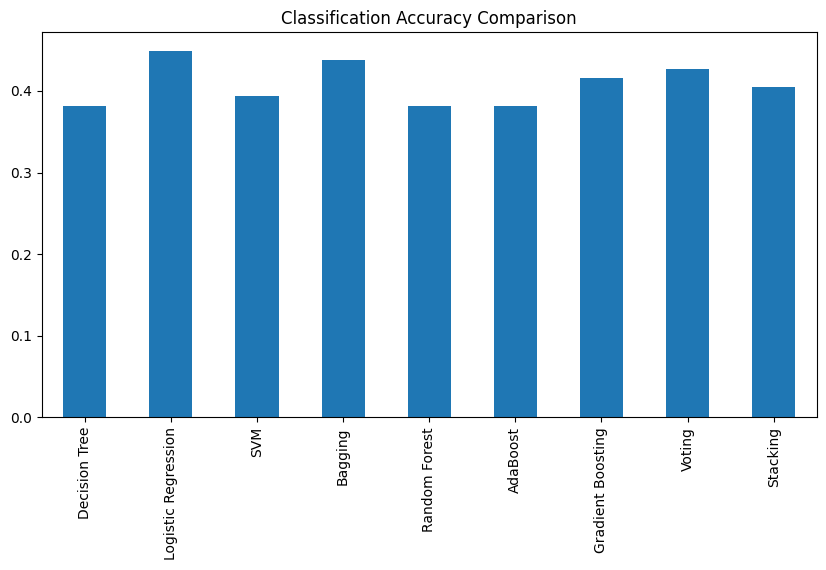

Best Classification Model: Logistic Regression


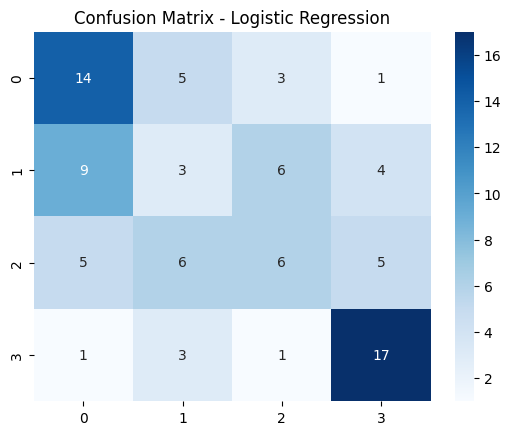

In [53]:
results_clf = {}

for name, model in models_clf.items():
    y_pred = model.predict(Xc_test_scaled)
    acc = accuracy_score(yc_test_binned, y_pred)
    prec = precision_score(yc_test_binned, y_pred, average='weighted')
    rec = recall_score(yc_test_binned, y_pred, average='weighted')
    f1 = f1_score(yc_test_binned, y_pred, average='weighted')
    results_clf[name] = [acc, prec, rec, f1]

results_clf_df = pd.DataFrame(results_clf, index=["Accuracy", "Precision", "Recall", "F1"]).T
print(results_clf_df)

# Plot accuracy comparison
results_clf_df["Accuracy"].plot(kind="bar", figsize=(10,5), title="Classification Accuracy Comparison")
plt.show()

best_model_name = results_clf_df["Accuracy"].idxmax()
best_model = models_clf[best_model_name]
print("Best Classification Model:", best_model_name)

y_pred_best = best_model.predict(Xc_test_scaled)
cm = confusion_matrix(yc_test_binned, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()



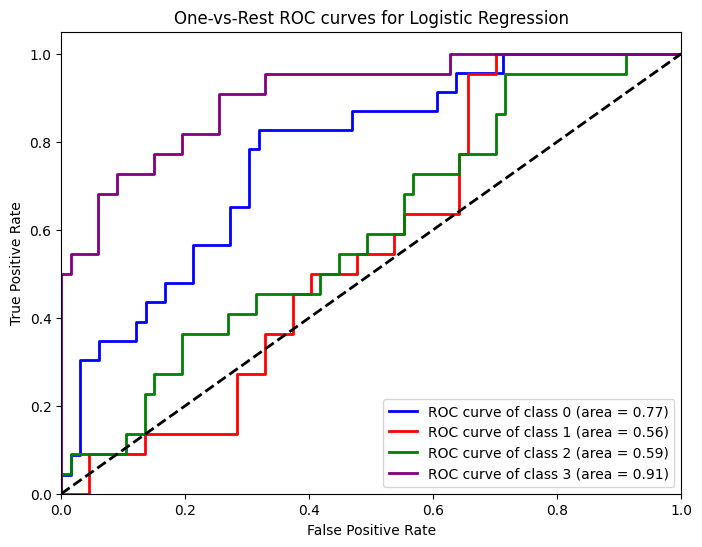

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# ROC curve
n_classes = len(np.unique(yc_test_binned))
y_test_bin = label_binarize(yc_test_binned, classes=np.unique(yc_test_binned))



y_score = best_model.predict_proba(Xc_test_scaled)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"One-vs-Rest ROC curves for {best_model_name}")
plt.legend(loc="lower right")
plt.show()

Print final scores

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_results = {}

for name, model in models.items():

    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])

    X_test_transformed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_transformed)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_results[name] = rmse

print("Regression Model Performance:")
print("R² Scores:")
for name, r2 in results.items():
    print(f"{name}: {r2:.4f}")

print("\nRMSE:")
for name, rmse_val in rmse_results.items():
    print(f"{name}: {rmse_val:.4f}")

Regression Model Performance:
R² Scores:
Bagging: 0.4615
Random Forest: 0.4433
AdaBoost: 0.3949
Gradient Boosting: 0.4398
Voting: 0.4357
Stacking: 0.4744

RMSE:
Bagging: 0.5085
Random Forest: 0.5171
AdaBoost: 0.5390
Gradient Boosting: 0.5187
Voting: 0.5206
Stacking: 0.5024
